In [1]:
import pandas as pd
from distutils.version import StrictVersion
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import json

from pandas.io.json import json_normalize

from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [15,3]

In [2]:
df_raw = pd.read_parquet('./parquet_conversion/deduped.lateral.parquet', engine='pyarrow')

In [3]:
df_raw['date'] = df_raw.gameCreation.dt.date

In [4]:
def nameFromSummonerId(x):
    if x == 73012371.0:
        return 'jokokoloko'
    elif x == 61079726.0:
        return 'Skeevo'
    elif x == 22928658.0:
        return 'iKledYouNot'
    elif x == 64811789.0:
        return 'Channsanity'
    elif x == 64983167.0:
        return 'Rudo'
    elif x == 23037187.0:
        return 'Fláy'
    elif x == 23455234.0:
        return 'BokuWaHenry'
    elif x == 23924232.0:
        return 'Sheldor'
    elif x == 24132946.0:
        return 'DrArchadium'
    elif x == 21411852.0:
        return 'Onishfu'
    elif x == 64739124.0:
        return 'AgileOverlord'
    return 'unknown'

In [5]:
def extractShortVersion(x):
    split_array = x.split('.')
    major = split_array[0]
    minor = split_array[1]
    if len(minor) < 2:
        minor = "0{num}".format(num=minor)
    return float("{major}.{minor}".format(major=major, minor=minor))

df_raw['shortVersion'] = df_raw.gameVersion.apply(extractShortVersion)
# df['ver'] = df['shortVersion'].apply(StrictVersion)

In [6]:
df_raw['win'] = df_raw.win.apply(lambda x: 1 if x == 'Win' else 0)

In [7]:
df_raw.groupby(['player.summonerId', 'player.summonerName'], sort=False, as_index=False).count().sort_values(by='gameCreation', ascending=False).head(n=20)

,player.summonerId,player.summonerName,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
138,73012371.0,jokokoloko,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,597,598,478,478,590,590,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,480,480,598,598,598,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,598,598,598,598,598

In [8]:
df = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (df_raw['shortVersion'] == 8.19) &
    (
        (df_raw['queueId'] == 400) 
    )
]

In [9]:
df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,player.summonerId,player.summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
19057,2018-10-09 05:22:54.038,2263,2883647235,CLASSIC,MATCHED_GAME,8.19.246.5109,11,NA1,400,11,6,218766345,218766345,NA1,/v1/stats/player_history/NA1/218766345,NA1,3632,61079726.0,Skeevo,21,BRONZE,4,7,9,17,0,6479,6479,9909,5,0,False,False,True,False,False,False,17646,16520,0,3147,3142,3094,3006,3071,3026,3340,2,11,863,8,1,792,7072,1736,6741,4,0.0,0.0,0,6,0,8005.0,2932.0,2121.0,811.0,911

In [45]:
df_ranked = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (df_raw['shortVersion'] == 8.19) &
    (
        (df_raw['queueId'] == 420) |
        (df_raw['queueId'] == 440)
    )
]

In [11]:
champions_raw = pd.read_json('http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json')
champions_raw.head()

,type,format,version,data
Aatrox,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Aatrox', 'key': '..."
Ahri,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Ahri', 'key': '10..."
Akali,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Akali', 'key': '8..."
Alistar,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Alistar', 'key': ..."
Amumu,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Amumu', 'key': '3..."


In [12]:
champions_raw['json'] = champions_raw['data'].apply(lambda x: json.loads(json.JSONEncoder().encode(x)))
champions = json_normalize(champions_raw['json'])
champions = champions.astype({
    'key': 'int64'
})
champions.head()

,blurb,id,image.full,image.group,image.h,image.sprite,image.w,image.x,image.y,info.attack,info.defense,info.difficulty,info.magic,key,name,partype,stats.armor,stats.armorperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackrange,stats.attackspeedoffset,stats.attackspeedperlevel,stats.crit,stats.critperlevel,stats.hp,stats.hpperlevel,stats.hpregen,stats.hpregenperlevel,stats.movespeed,stats.mp,stats.mpperlevel,stats.mpregen,stats.mpregenperlevel,stats.spellblock,stats.spellblockperlevel,tags,title,version
0,"Aatrox is a legendary warrior, one of only fiv...",Aatrox,Aatrox.png,champion,48,champion0.png,48,0,0,8,4,4,3,266,Aatrox,BloodWell,24.384,3.8,60.3760,3.20,150.0,-0.040,3.000,0.0,0.0,537.80,85.0,6.590,0.50,345.0,105.60,45.0,0.00,0.000,32.1,1.25,"[Fighter, Tank]",the Darkin Blade,6.24.1
1,Unlike other foxes that roamed the woods of so...,Ahri,Ahri.png,champion,48,champion0.png,48,48,0,3,4,5,8,103,Ahri,MP,20.880,3.5,53.0400,3.00,550.0,-0.065,2.000,0.0,0.0,514.40,80.0,6.505,0.60,330.0,334.00,50.0,6.00,0.800,30.0,0.00,"[Mage, Assassin]",the Nine-Tailed Fox,6.24.1
2,There exists an ancient order originating in t...,Akali,Akali.png,champion,48,champion0.png,48,96,0,5,3,7,8,84,Akali,Energy,26.380,3.5,58.3760,3.20,125.0,-0.100,3.100,0.0,0.0,587.80,85.0,8.340,0.65,350.0,200.00,0.0,50.00,0.000,32.1,1.25,[Assassin],the Fist of Shadow,6.24.1
3,As the mightiest warrior to ever emerge from t...,Alistar,Alistar.png,champion,48,champion0.png,48,144,0,6,9,7,5,12,Alistar,MP,24.380,3.5,61.1116,3.62,125.0,0.000,2.125,0.0,0.0,613.36,106.0,8.675,0.85,330.0,278.84,38.0,8.50,0.800,32.1,1.25,"[Tank, Support]",the Minotaur,6.24.1
4,''Solitude can be lonelier than death.''<br><b...,Amumu,Amumu.png,champion,48,champion0.png,48,192,0,2,6,3,8,32,Amumu,MP,23.544,3.8,53.3840,3.80,125.0,-0.020,2.180,0.0,0.0,613.12,84.0,8.875,0.85,335.0,287.20,40.0,7.38,0.525,32.1,1.25,"[Tank, Mage]",the Sad Mummy,6.24.1


In [64]:
dfp = pd.merge(df, df, on='gameId')[['gameId', 'championId_x', 'championId_y', 'win_x']]
dfp = pd.merge(dfp, champions[['id', 'key']], left_on='championId_x', right_on='key', suffixes=['', '_x'])
dfp = pd.merge(dfp, champions[['id', 'key']], left_on='championId_y', right_on='key', suffixes=['', '_y'])

In [65]:
dfp_1 = dfp.groupby(['id']).filter(lambda x: len(x) >= 10)

In [66]:
dfp = dfp[dfp['id'].isin(dfp_1['id'].unique()) & dfp['id_y'].isin(dfp_1['id'].unique())]

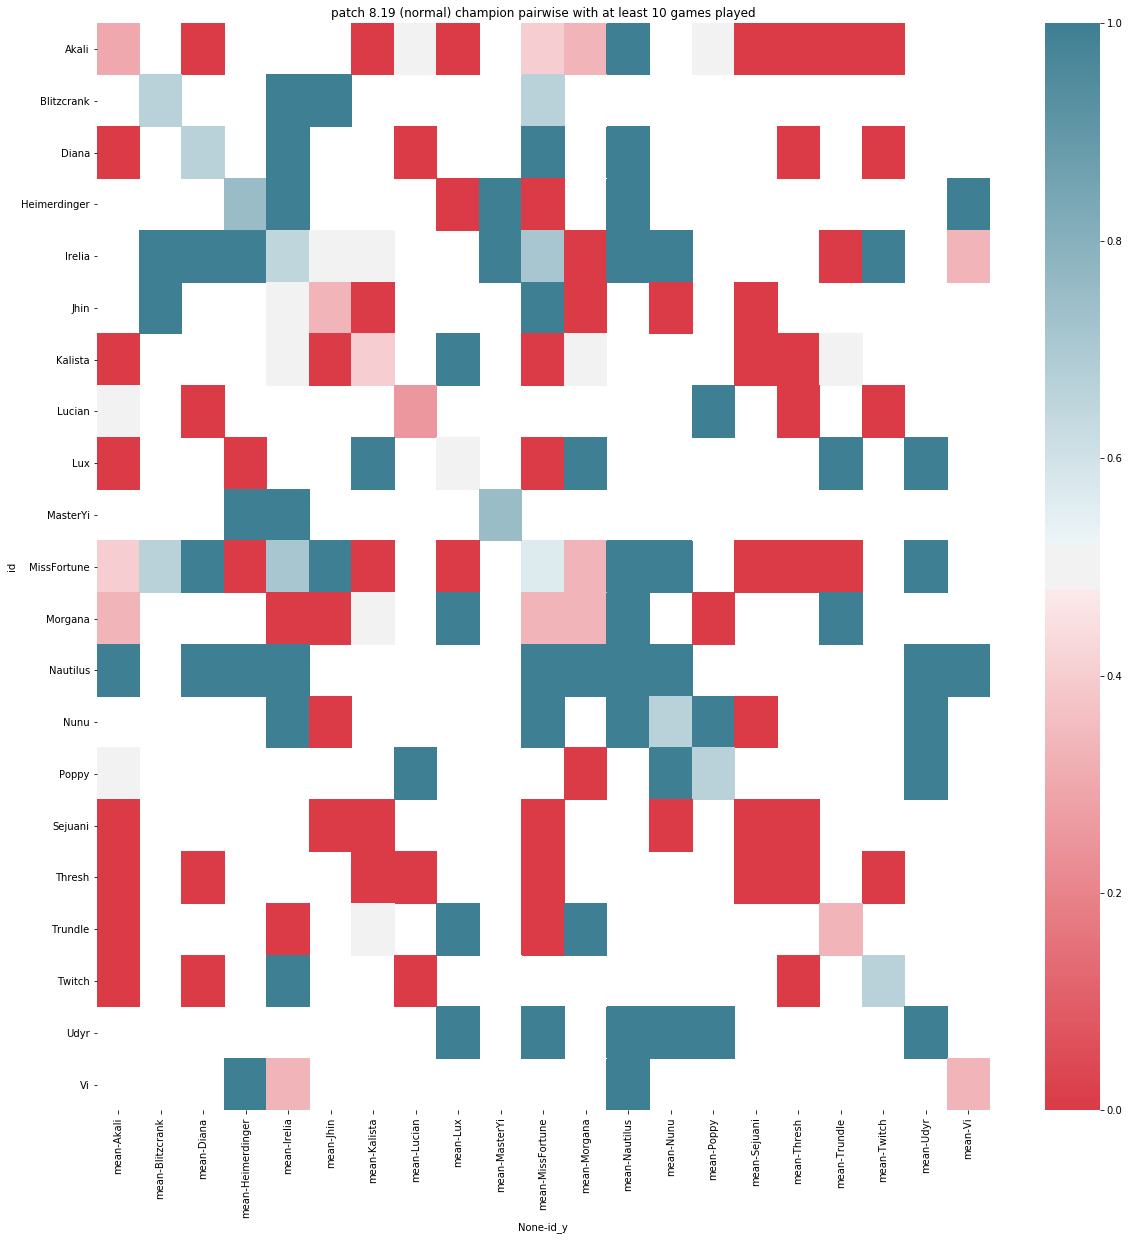

In [67]:
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
win_rate_pivot_table = pd.pivot_table(dfp, values='win_x', index=['id'], columns=['id_y'], aggfunc=[np.mean])
# plt.title('patch 8.19(normal) champion pairwise with at least 10 games played')
ax.set_title('patch 8.19 (normal) champion pairwise with at least 10 games played')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
sns.heatmap(win_rate_pivot_table, cmap=cmap)

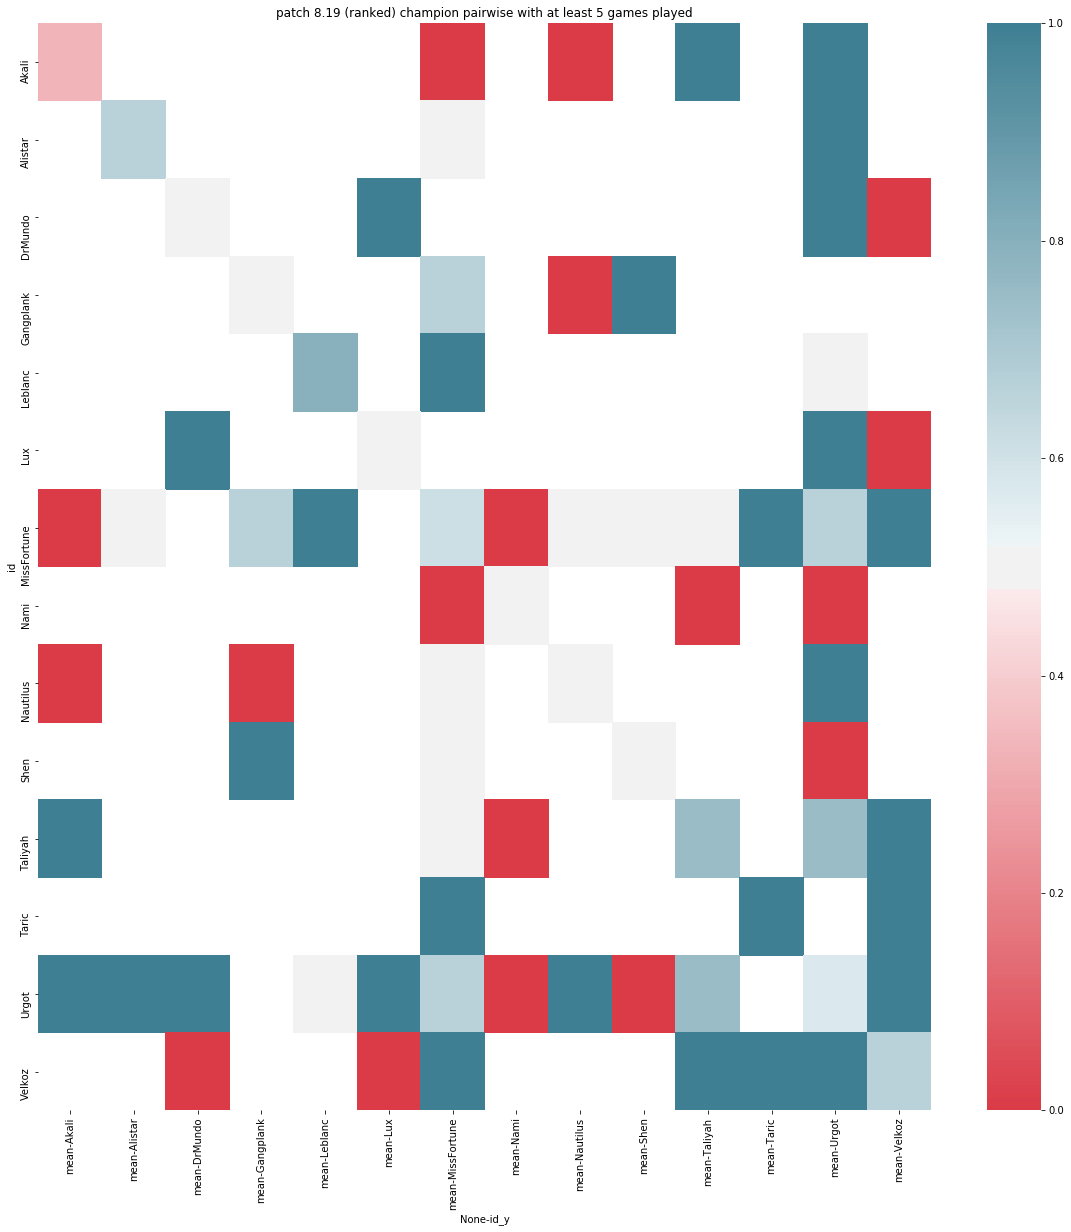

In [74]:
dfp = pd.merge(df_ranked, df_ranked, on='gameId')[['gameId', 'championId_x', 'championId_y', 'win_x']]
dfp = pd.merge(dfp, champions[['id', 'key']], left_on='championId_x', right_on='key', suffixes=['', '_x'])
dfp = pd.merge(dfp, champions[['id', 'key']], left_on='championId_y', right_on='key', suffixes=['', '_y'])

dfp_1 = dfp.groupby(['id']).filter(lambda x: len(x) > 5)
dfp = dfp[dfp['id'].isin(dfp_1['id'].unique()) & dfp['id_y'].isin(dfp_1['id'].unique())]

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
ax.set_title('patch 8.19 (ranked) champion pairwise with at least 5 games played')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

win_rate_pivot_table = pd.pivot_table(dfp, values='win_x', index=['id'], columns=['id_y'], aggfunc=[np.mean])
sns.heatmap(win_rate_pivot_table, cmap=cmap)